In [1]:
import pandas as pd
import numpy as np

#definicao do conjunto de dados 
t = [0.000, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000]
x = [0.7416, 0.2685, 0.3333, 0.3982, -0.0749, -0.3089, 0.3333, 0.9756, 0.7416]
y = [0.7416, 0.9756, 0.3333, -0.3089, -0.0749, 0.3982, 0.3333, 0.2685, 0.7416]
z = [-0.4832, -0.2441, 0.3334, 0.9107, 1.1498, 0.9107, 0.3334, -0.2441, -0.4832]

#construção do data frame com o conjunto de dados
dados = pd.DataFrame([t, x, y, z]).set_index([['t', 'x', 'y', 'z']])
dados


,0,1,2,3,4,5,6,7,8
t,0.0000,0.1250,0.2500,0.3750,0.5000,0.6250,0.7500,0.8750,1.0000
x,0.7416,0.2685,0.3333,0.3982,-0.0749,-0.3089,0.3333,0.9756,0.7416
y,0.7416,0.9756,0.3333,-0.3089,-0.0749,0.3982,0.3333,0.2685,0.7416
z,-0.4832,-0.2441,0.3334,0.9107,1.1498,0.9107,0.3334,-0.2441,-0.4832


<function matplotlib.pyplot.show(close=None, block=None)>

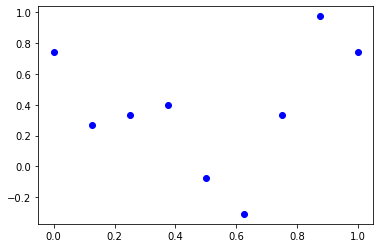

In [2]:
import matplotlib.pyplot as plt
plt.plot(t, x, 'bo')
plt.show

In [41]:
def coef_interpolacao(a, b):
    #criacao da matriz de zeros a ser preenchida
    n = len(a)
    matriz = np.zeros([n, n])
    #primeira coluna são os termos juntos ao x^0
    matriz[:,0] = b

    #metodo das diferenciais de newton
    for c in range(1, n):
        for l in range(n-c):
            matriz[l][c] = (matriz[l+1][c-1] - matriz[l][c-1]) / (a[l+c] - a[l])

    #primeira linha da matriz representa os coeficientes em ordem 
    coef = matriz[0]
    return matriz

pd.DataFrame(coef_interpolacao(t, x))


,0,1,2,3,4,5,6,7,8
0,0.7416,-3.7848,17.2128,-45.892267,-0.051200,359.219200,-1008.781084,1187.012998,-20.222537
1,0.2685,0.5184,0.0032,-45.917867,224.460800,-397.366613,29.855289,1166.790461,0.000000
2,0.3333,0.5192,-17.2160,66.312533,-23.893333,-374.975147,1050.796942,0.000000,0.000000
3,0.3982,-3.7848,7.6512,54.365867,-258.252800,413.122560,0.000000,0.000000,0.000000
4,-0.0749,-1.8720,28.0384,-74.760533,-0.051200,0.000000,0.000000,0.000000,0.000000
5,-0.3089,5.1376,0.0032,-74.786133,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.3333,5.1384,-28.0416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.9756,-1.8720,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.7416,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
def polinomio_interpolado(coef, t, a):
    n = len(t)-1

    y = coef[0]
    for i in range(1, n):
        alpha = coef[i]
        for j in range(0, i):
            alpha = alpha*(a-t[j])

        y += alpha

    return y    

In [32]:
#criação dos coeficientes para cada variável
poly_x = coef_interpolacao(t, x)
poly_y = coef_interpolacao(t, y)
poly_z = coef_interpolacao(t, z)

In [38]:
#
t_j = np.arange(1, 51)/50

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])